In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style = "darkgrid")

In [3]:
data = pd.read_csv(r"C:\Users\Lokesh Patra\Documents\Projects\2nd LDS\Loan Defaulter Training Data.csv")
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
rows, columns = data.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 252000
Columns: 13


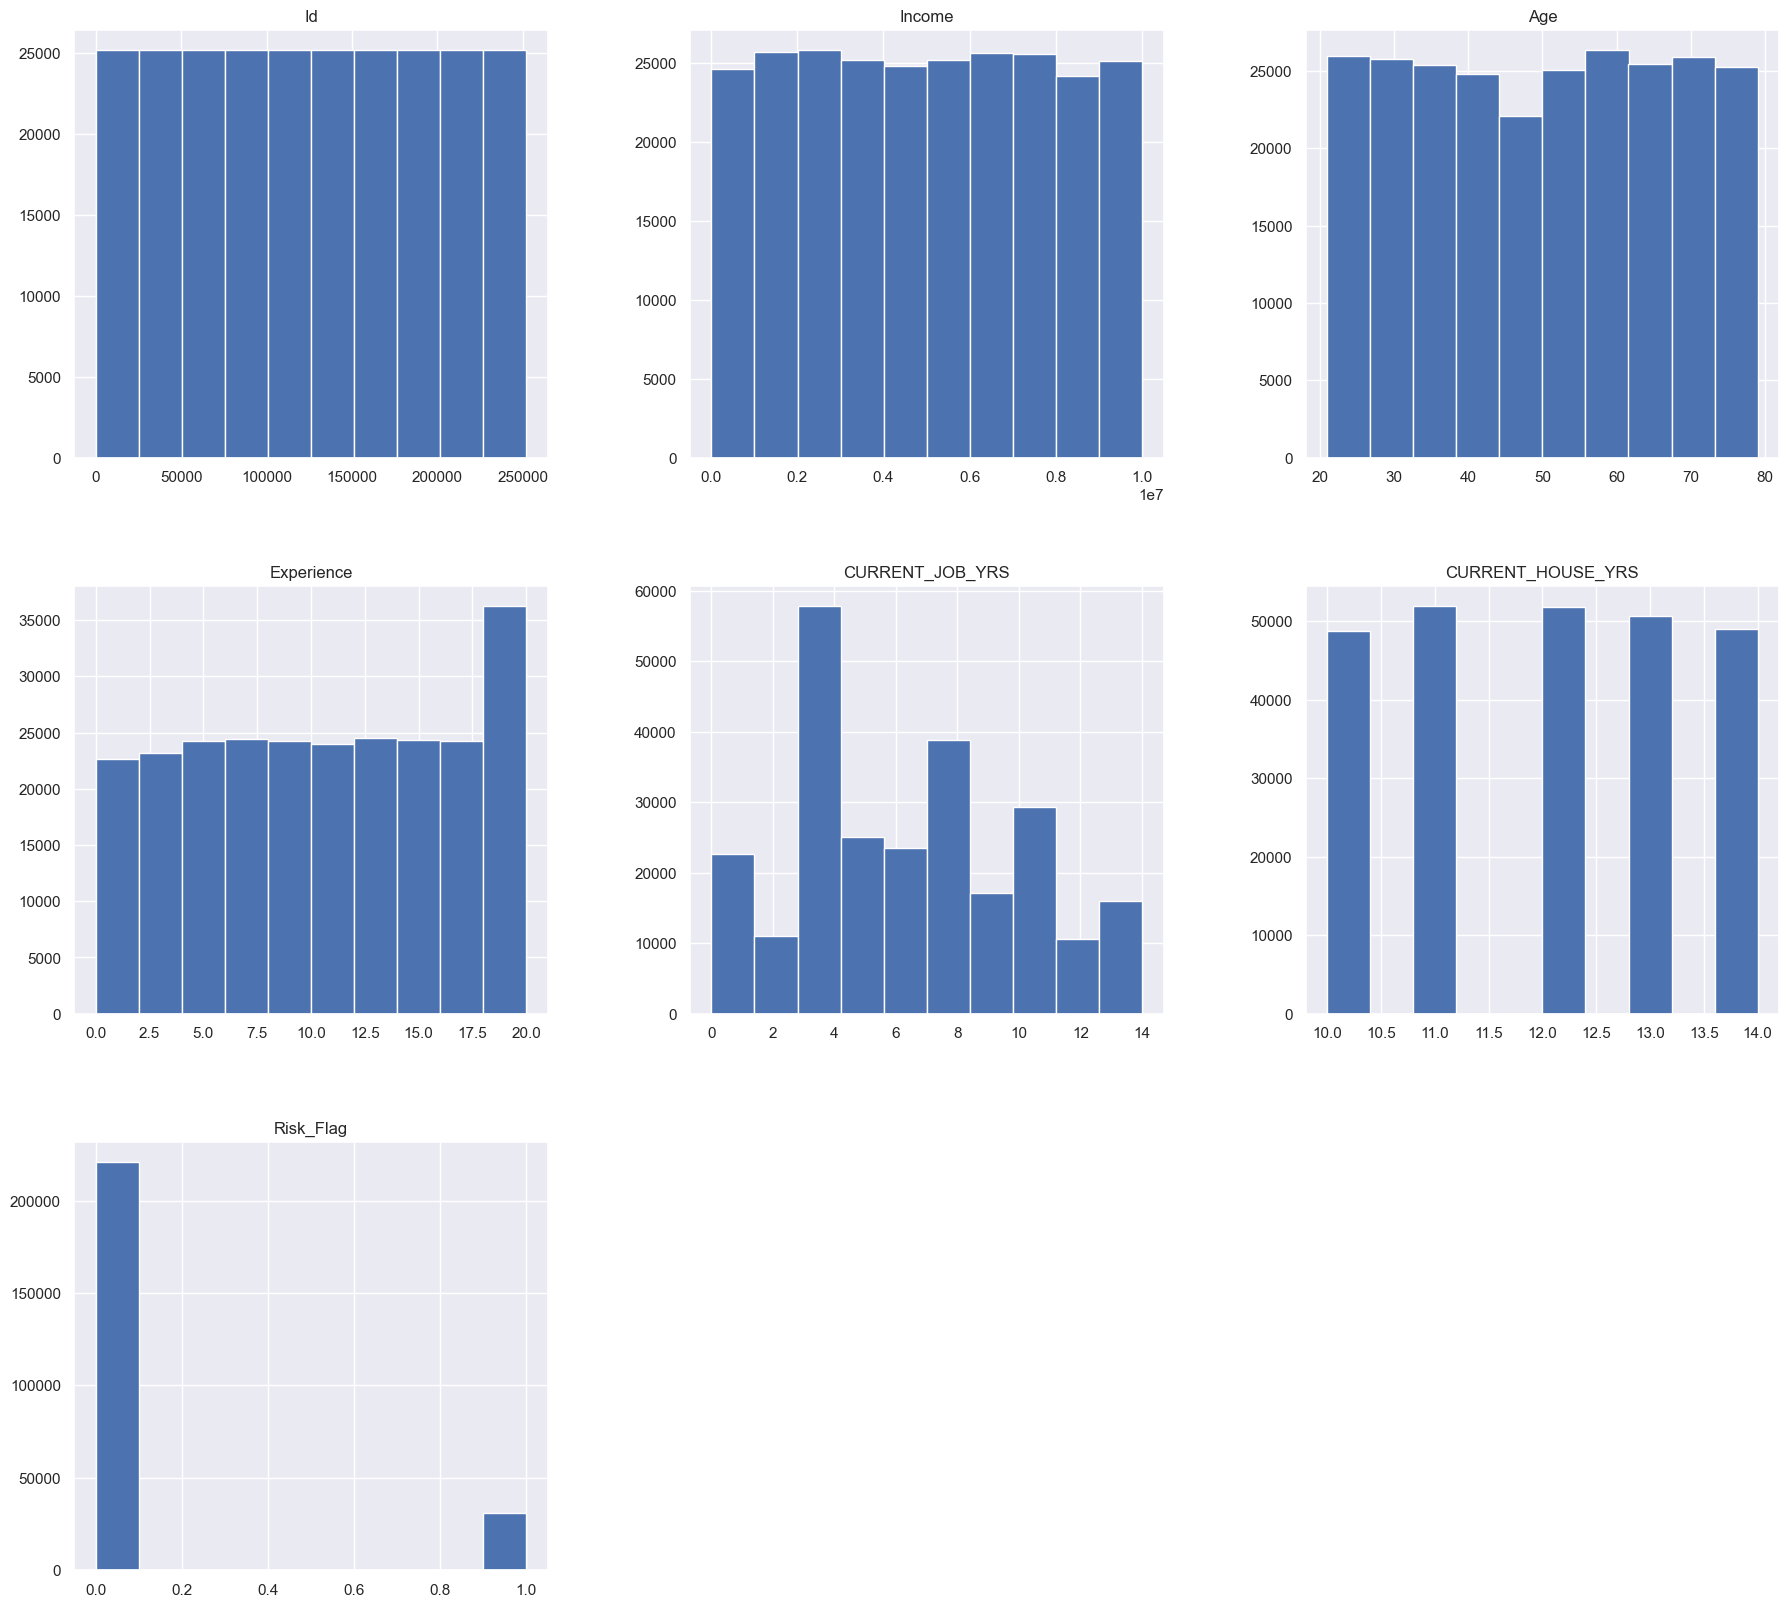

In [4]:
data.hist( figsize = (22, 20) )
plt.show()

#first, we check the data distribution
#Only a small part of the target variable consists of people who default on loans.

In [5]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [6]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [7]:
data["Risk_Flag"].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

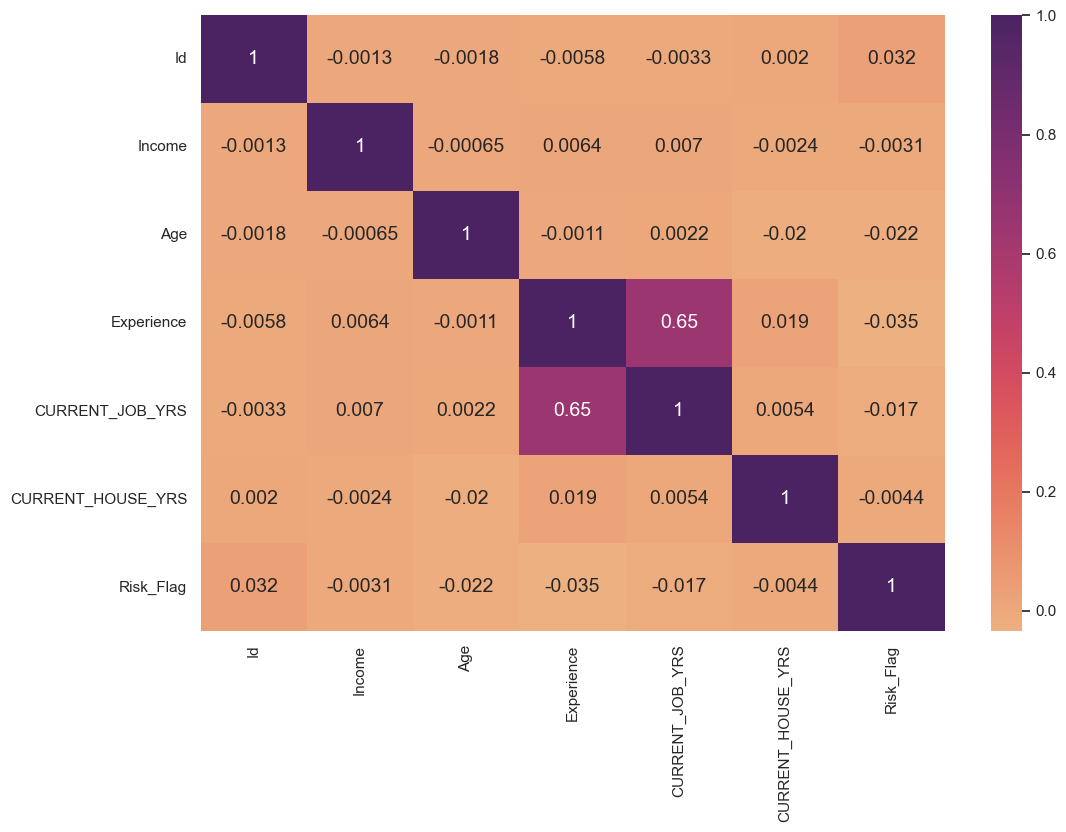

In [4]:
fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = data.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()
#correlation matrix
#we notice there is a fairly strong correlation between experience and current job years, which is self justified

In [7]:
#Now, we proceed with the analysis of categorical features through bar grafhs
def categorical_valcount_hist(feature):
    print(data[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=data)
    plt.show()

single     226272
married     25728
Name: Married/Single, dtype: int64


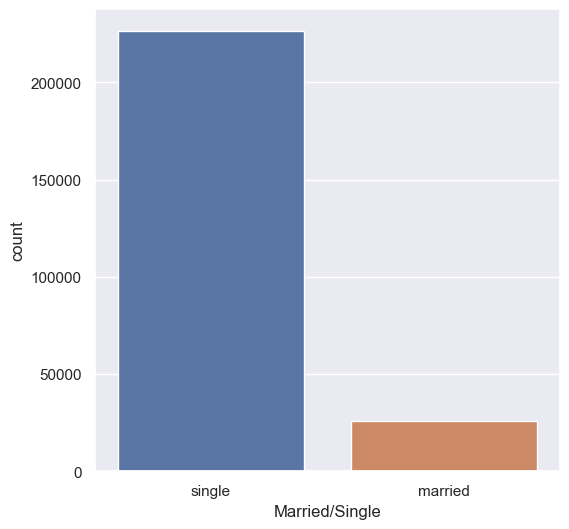

In [10]:
categorical_valcount_hist("Married/Single")
#So, the majority of the people are single.

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64


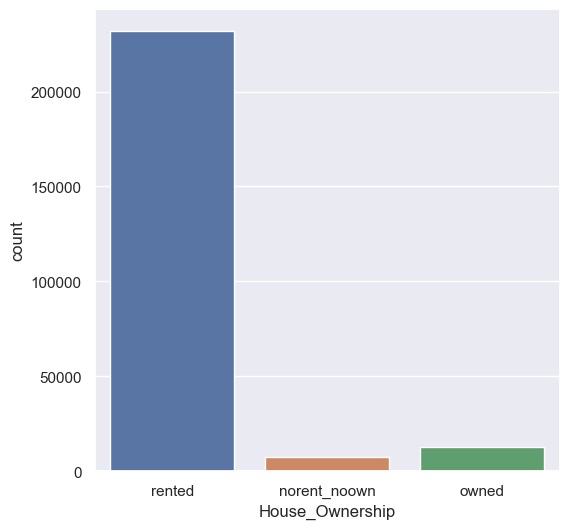

In [8]:
categorical_valcount_hist("House_Ownership")
#majority of the people have a rented accomodation

In [11]:
print( "Total categories in STATE:", len( data["STATE"].unique() ) )
print()
print( data["STATE"].value_counts() )

Total categories in STATE: 29

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64


In [12]:
print( "Total categories in Profession:", len( data["Profession"].unique() ) )
print()
data["Profession"].value_counts()

Total categories in Profession: 51



Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

<AxesSubplot:xlabel='Risk_Flag', ylabel='Income'>

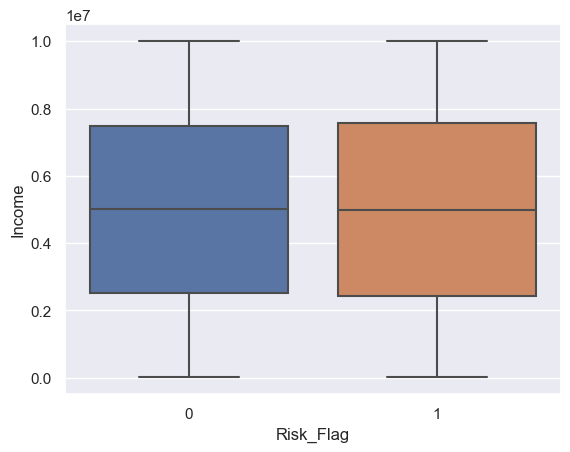

In [13]:
#Now, we start with understanding the relationship between the different data features. here we compare the relationship of the target risk flag variable with other numerical feature variables
sns.boxplot(x ="Risk_Flag",y="Income" ,data = data)

<AxesSubplot:xlabel='Risk_Flag', ylabel='Age'>

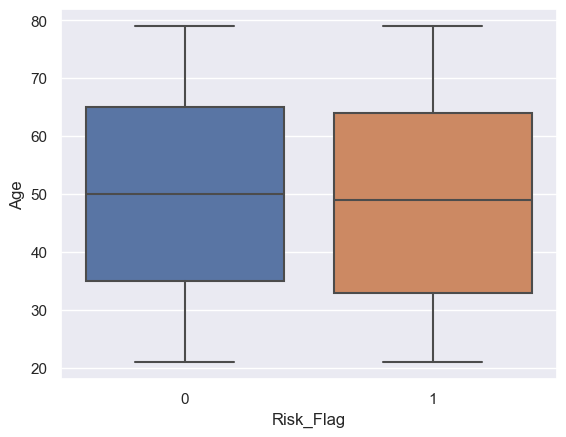

In [9]:
sns.boxplot(x ="Risk_Flag",y="Age" ,data = data)

<AxesSubplot:xlabel='Risk_Flag', ylabel='Experience'>

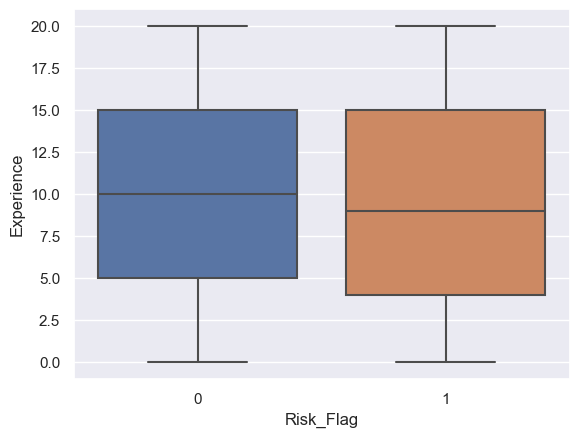

In [10]:
sns.boxplot(x ="Risk_Flag",y="Experience" ,data = data)

<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

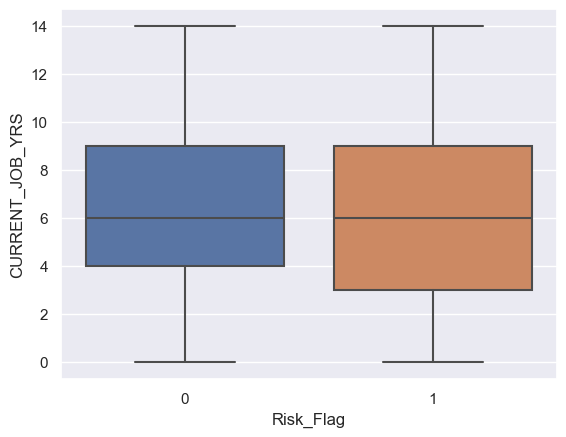

In [11]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_JOB_YRS" ,data = data)

<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_HOUSE_YRS'>

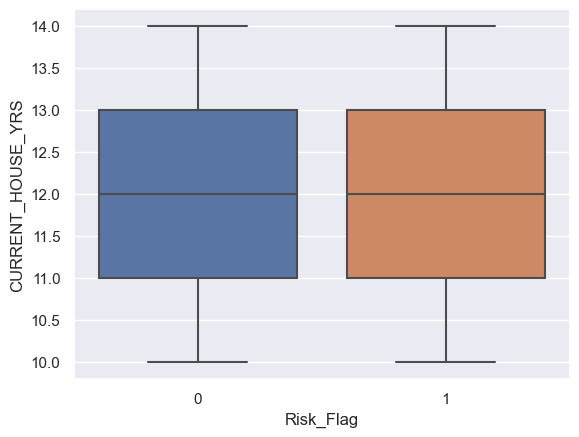

In [12]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_HOUSE_YRS" ,data = data)

<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

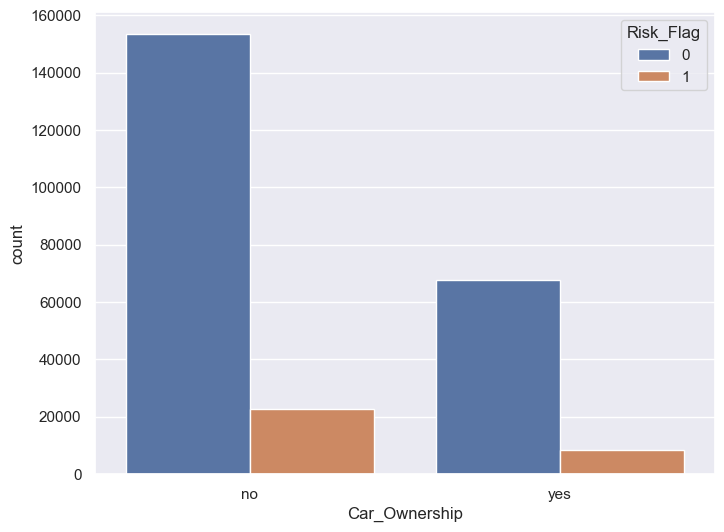

In [13]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='Car_Ownership', hue='Risk_Flag', ax=ax, data=data)
#we see that higher no. of possible defaulters have no car.

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

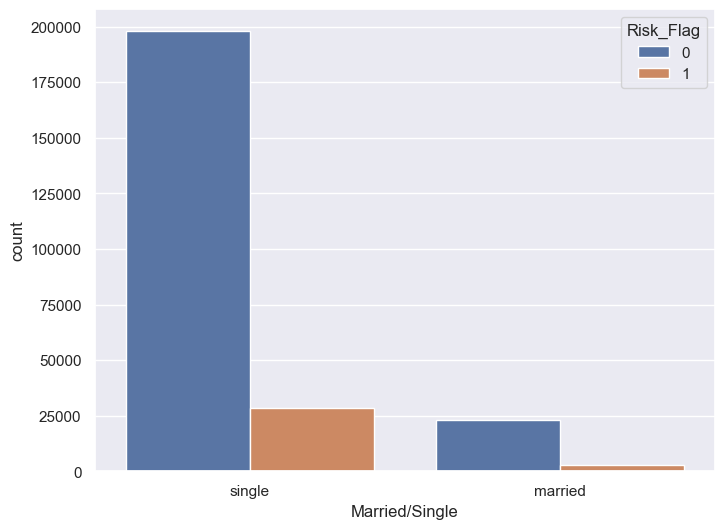

In [14]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='Married/Single', hue='Risk_Flag', data=data )
#we see that higher no. of possible defaulters are single

<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

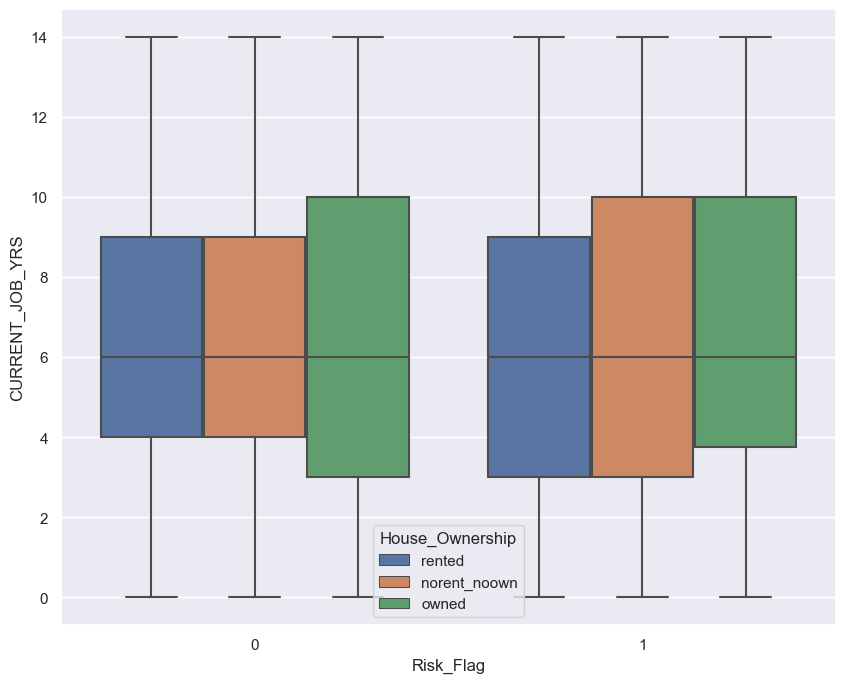

In [15]:
fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = "Risk_Flag", y = "CURRENT_JOB_YRS", hue='House_Ownership', data = data)
#we see that higher no. of possible defaulters neither have a rented or own house whearas most of the people who are unlikely to default their loan have their own house.

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
label_encoder = LabelEncoder() 
for col in ['Married/Single','Car_Ownership']: 
    data[col] = label_encoder.fit_transform( data[col] )

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['Married/Single', 'Car_Ownership']:
    data[col] = label_encoder.fit_transform(data[col])

In [8]:
onehot_encoder = OneHotEncoder(sparse = False)
data['House_Ownership'] = onehot_encoder.fit_transform(data['House_Ownership'].values.reshape(-1, 1) )

In [9]:
high_card_features = ['Profession', 'CITY', 'STATE']
count_encoder = ce.CountEncoder()
#Transforming the features, and renaming the columns with the _count suffix, and joining to the dataframe.
count_encoded = count_encoder.fit_transform( data[high_card_features] )
data = data.join(count_encoded.add_suffix("_count"))
data= data.drop(labels=['Profession', 'CITY', 'STATE'], axis=1)

In [10]:
x = data.drop("Risk_Flag", axis=1)
y = data["Risk_Flag"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 7)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)
smote_sampler = SMOTE(random_state=9)
pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', rf_clf]])
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

In [9]:
y_pred[0:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
#The precision of 54.31% indicates that when the model predicts a sample as a "yes" (default, positive class), it is correct approximately 54.31% of the time. Higher precision means the model has a low rate of false positives.
#The recall of 53.80% means that the model correctly identifies approximately 53.80% of the actual positive samples (defaults).
#The F1 score of 54.05% is the harmonic mean of precision and recall and provides a balanced measure between them.
#The accuracy of 88.75% indicates the overall correctness of the model's predictions. 

-------------------------TEST SCORES-----------------------
Recall: 53.799
Precision: 54.3071
F1-Score: 54.0519
Accuracy score: 88.75


In [11]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

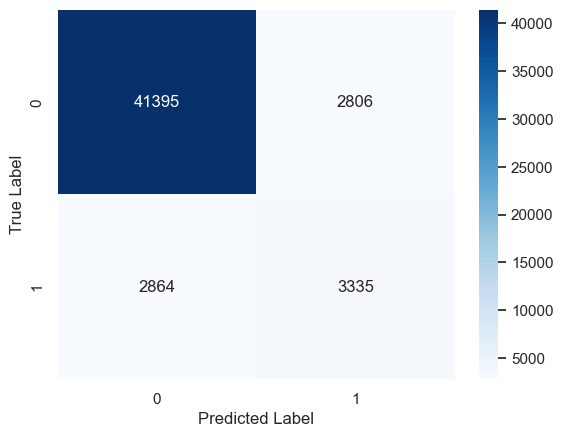

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Based on the evaluation metrics , we can plot the confusion matrix.
#The Confusion Matrix shows the performance of the Random Forest model for binary classification. It correctly predicted 41,395 positive instances (True Positives) and 3,335 negative instances (True Negatives). However, it made 2,806 incorrect positive predictions (False Positives) and 2,864 incorrect negative predictions (False Negatives). 

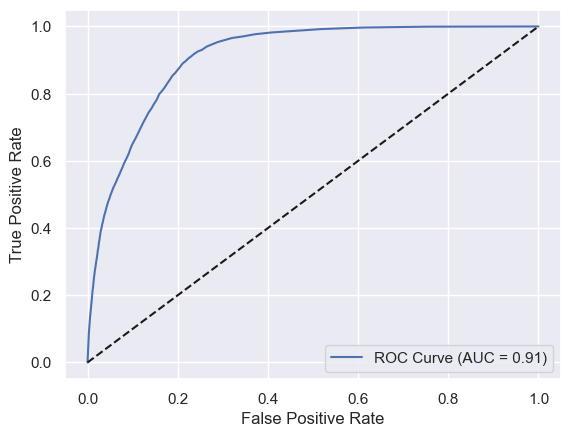

In [15]:
y_pred_proba = pipeline.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

#ROC Curve
#High AUC Indicates Good Model Discrimination on Imbalanced Data.

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     44201
           1       0.54      0.54      0.54      6199

    accuracy                           0.89     50400
   macro avg       0.74      0.74      0.74     50400
weighted avg       0.89      0.89      0.89     50400



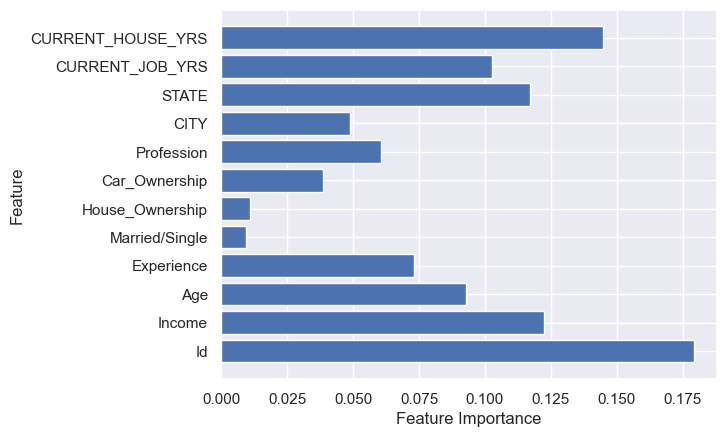

In [21]:
rf_model = pipeline.named_steps['classifier']
feature_importance = rf_model.feature_importances_
feature_names = ['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
#feature importances plot
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

#Relatively higher scores of current house yrs, state and income signifies the high influence of these features in the prediction